In [35]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df=pd.read_csv("Diwali Sales Data.csv",  encoding= 'unicode_escape') # Used 'unicode_escape' encoding to Handles special/non-ASCII characters to avoid decoding errors

In [37]:
df.shape

(11251, 15)

In [38]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [82]:
df.duplicated().sum()

np.int64(8)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


Let's delete irrelevant or blank columns.

In [40]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [41]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

Let's drop null values in amount column.

In [42]:
df.dropna(inplace=True)

Changing Data Type of Amount.

In [43]:

df['Amount'] = df['Amount'].astype('int')

In [44]:
df['Amount'].dtypes

dtype('int64')

In [45]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis

Let's start from:
### Gender

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8988\4160130814.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Gender', data=df, palette='Set2')  # You can use other palettes like 'Set1', 'Blues', etc.


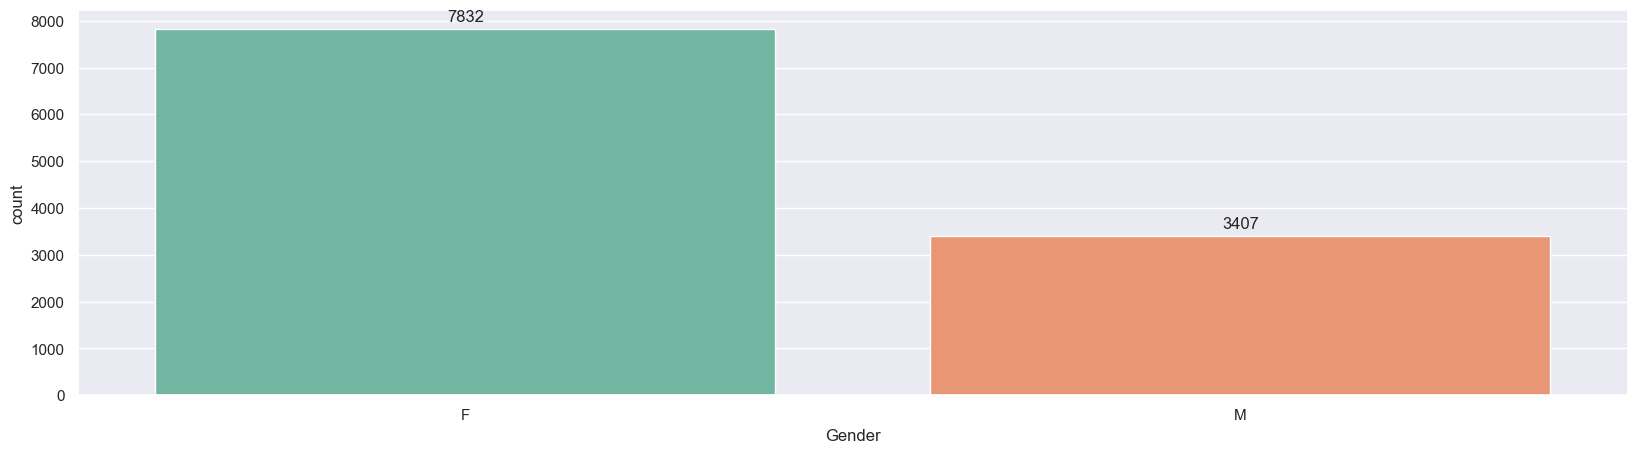

In [67]:
ax = sns.countplot(x='Gender', data=df, palette='Set2') 
for bars in ax.containers:
    ax.bar_label(bars, padding=3)

plt.xticks(rotation=0, ha='center')  
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8988\1160694482.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Gender', y='Amount', data=sales_gen, palette='Set2')


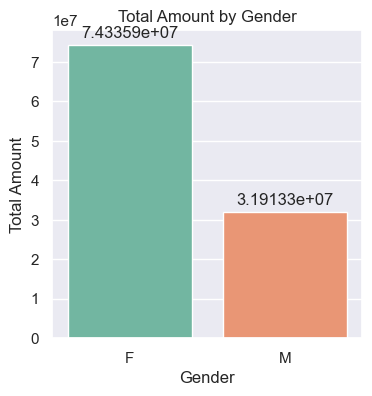

In [69]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(4,4)})  
ax = sns.barplot(x='Gender', y='Amount', data=sales_gen, palette='Set2')  

for bars in ax.containers:
    ax.bar_label(bars, padding=3)

plt.xticks(rotation=0, ha='center')

ax.set_title('Total Amount by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Total Amount')
plt.show()

*Above graphs shows that most of the buyers are females and even the purchasing power of females are greater than men.*

### Age

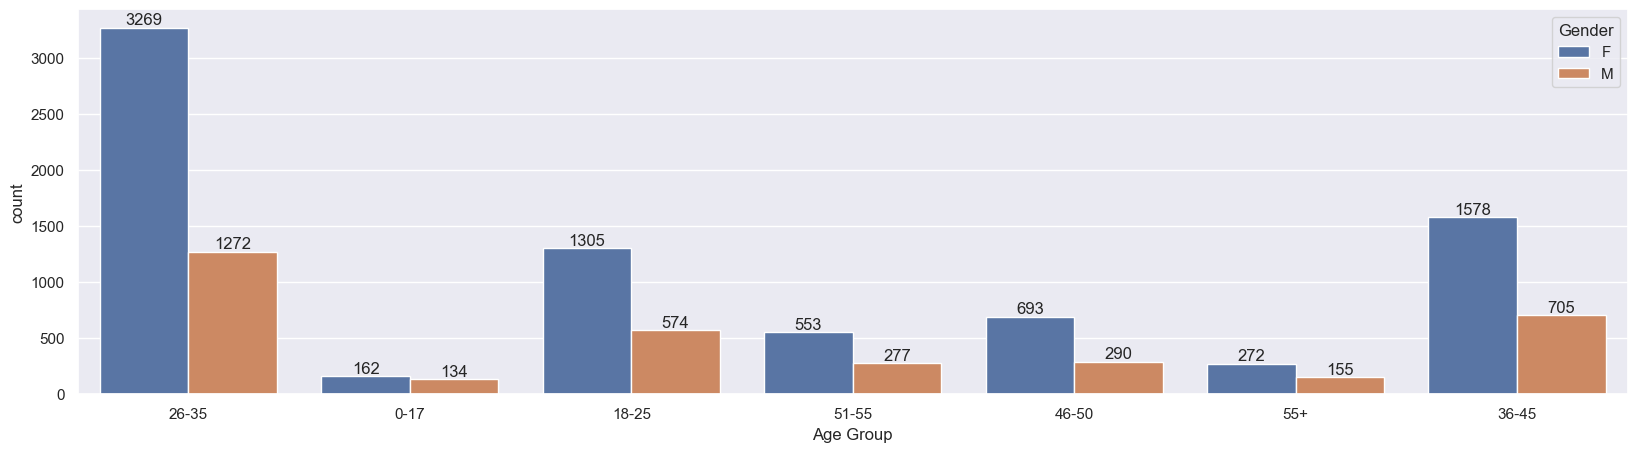

In [48]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8988\3450470099.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Age Group', y='Amount', data=sales_age, palette='Set2')


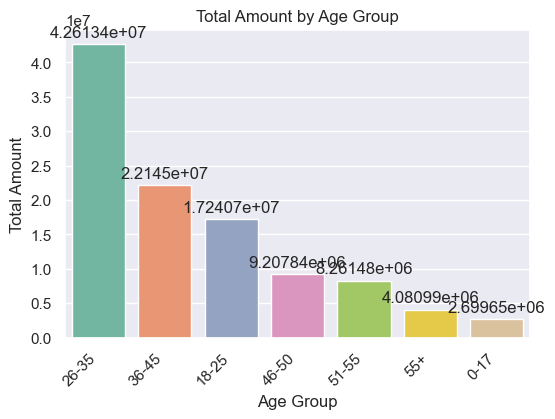

In [73]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,4)})  
ax = sns.barplot(x='Age Group', y='Amount', data=sales_age, palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars, padding=3)

plt.xticks(rotation=45, ha='right')
ax.set_title('Total Amount by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Total Amount')
plt.show()

*These graphs are shows that most of the buyers are of age group between 26-35 yrs female.*

### State

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8988\1118096684.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sales_state, x='State', y='Orders', palette='Set2')  # You can change 'Set2' to any other palette like 'Blues', 'Set1', etc.


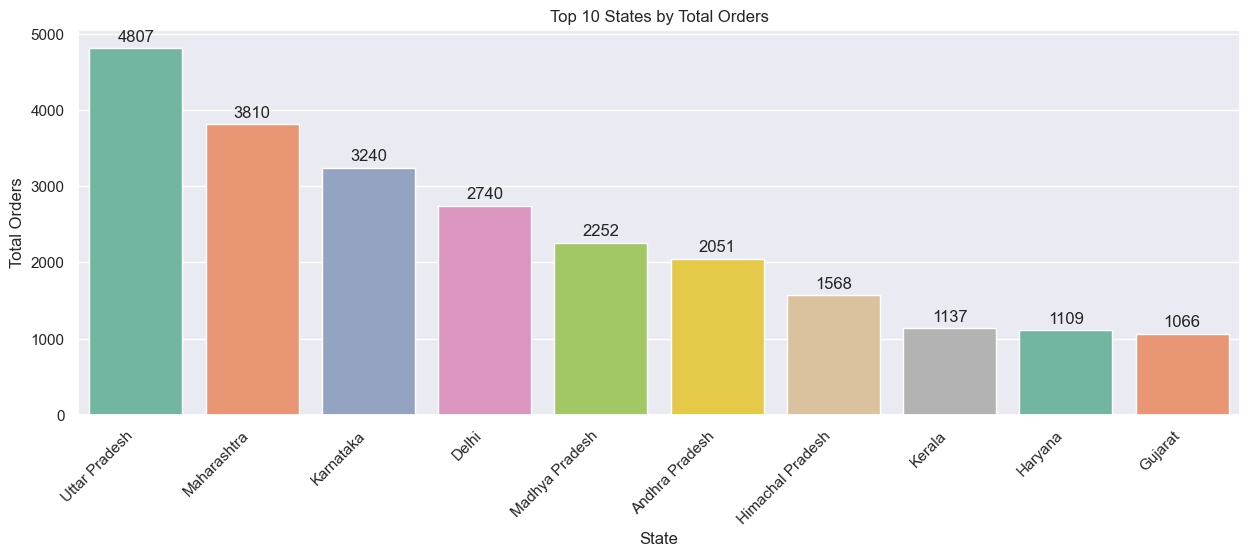

In [76]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)


sns.set(rc={'figure.figsize':(15,5)})

ax = sns.barplot(data=sales_state, x='State', y='Orders', palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars, padding=3)

plt.xticks(rotation=45, ha='right')

ax.set_title('Top 10 States by Total Orders')
ax.set_xlabel('State')
ax.set_ylabel('Total Orders')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8988\217817000.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sales_state, x='State', y='Amount', palette='Set2')


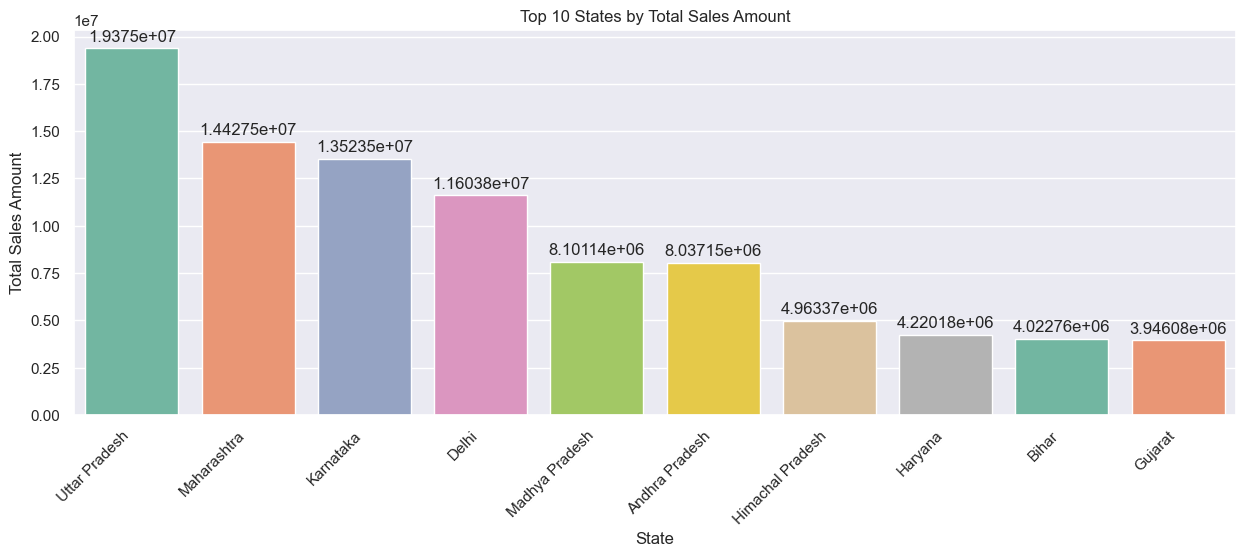

In [77]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})

ax = sns.barplot(data=sales_state, x='State', y='Amount', palette='Set2') 
for bars in ax.containers:
    ax.bar_label(bars, padding=3)

plt.xticks(rotation=45, ha='right')

ax.set_title('Top 10 States by Total Sales Amount')
ax.set_xlabel('State')
ax.set_ylabel('Total Sales Amount')
plt.show()

*we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.*


### Marital Status

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8988\3152906940.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Marital_Status', palette='Set2')


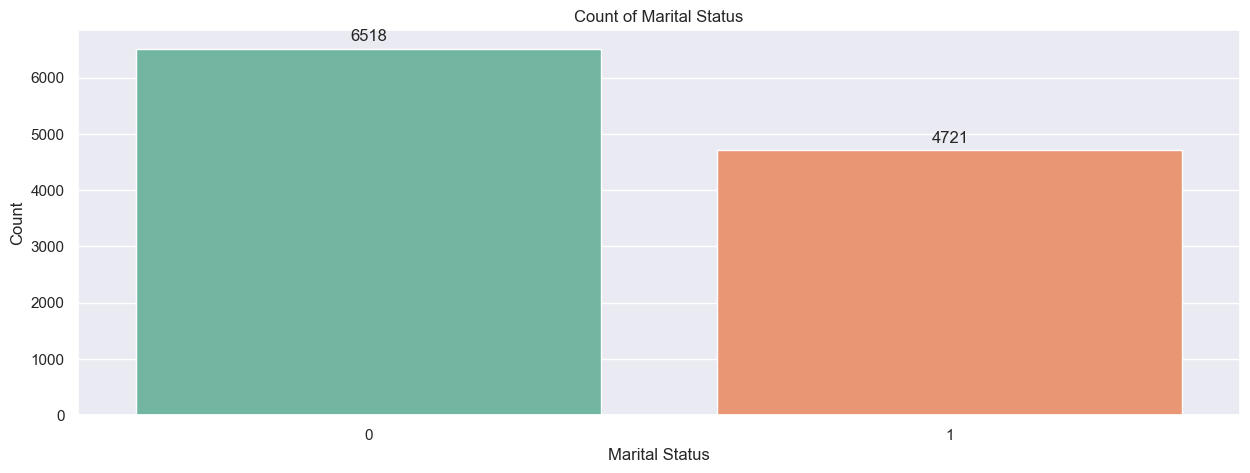

In [78]:
ax = sns.countplot(data=df, x='Marital_Status', palette='Set2')
sns.set(rc={'figure.figsize':(7,5)})

for bars in ax.containers:
    ax.bar_label(bars, padding=3)

plt.xticks(rotation=0)
ax.set_title('Count of Marital Status')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')

plt.show()

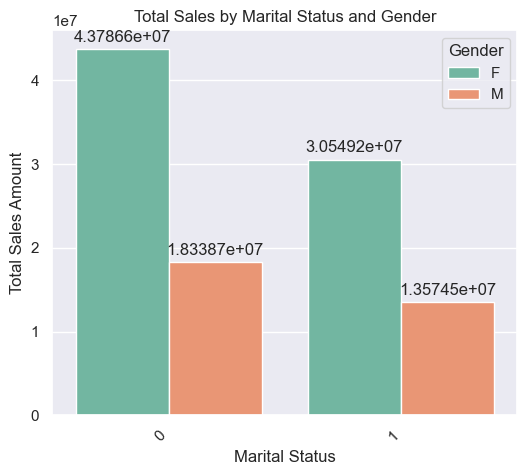

In [79]:
# Group by 'Marital_Status' and 'Gender' to sum 'Amount', then sort by 'Amount'
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(6,5)})

ax = sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender', palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars, padding=3)

plt.xticks(rotation=45, ha='right')
ax.set_title('Total Sales by Marital Status and Gender')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Total Sales Amount')
plt.show()

*Most of the buyers are married (women) and they have high purchasing power*

### Occupation

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8988\3835944169.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Occupation', palette='Set2')  # You can try other palettes like 'Set1', 'Blues', etc.


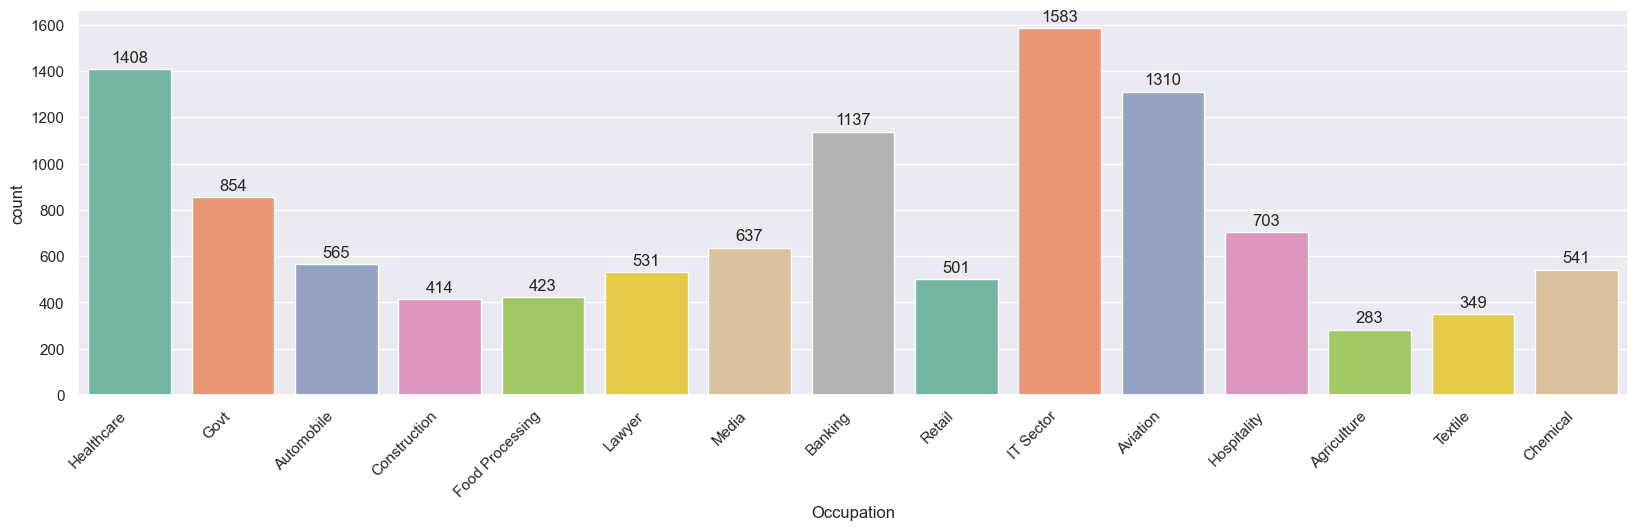

In [ ]:
# Set figure size
sns.set(rc={'figure.figsize':(20,5)})

ax = sns.countplot(data=df, x='Occupation', palette='Set2')  # You can try other palettes like 'Set1', 'Blues', etc.

for bars in ax.containers:
    ax.bar_label(bars, padding=3)

plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8988\3119277710.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_state, x='Occupation', y='Amount', palette='Set2')  # You can use other palettes like 'Blues', 'Set1', etc.


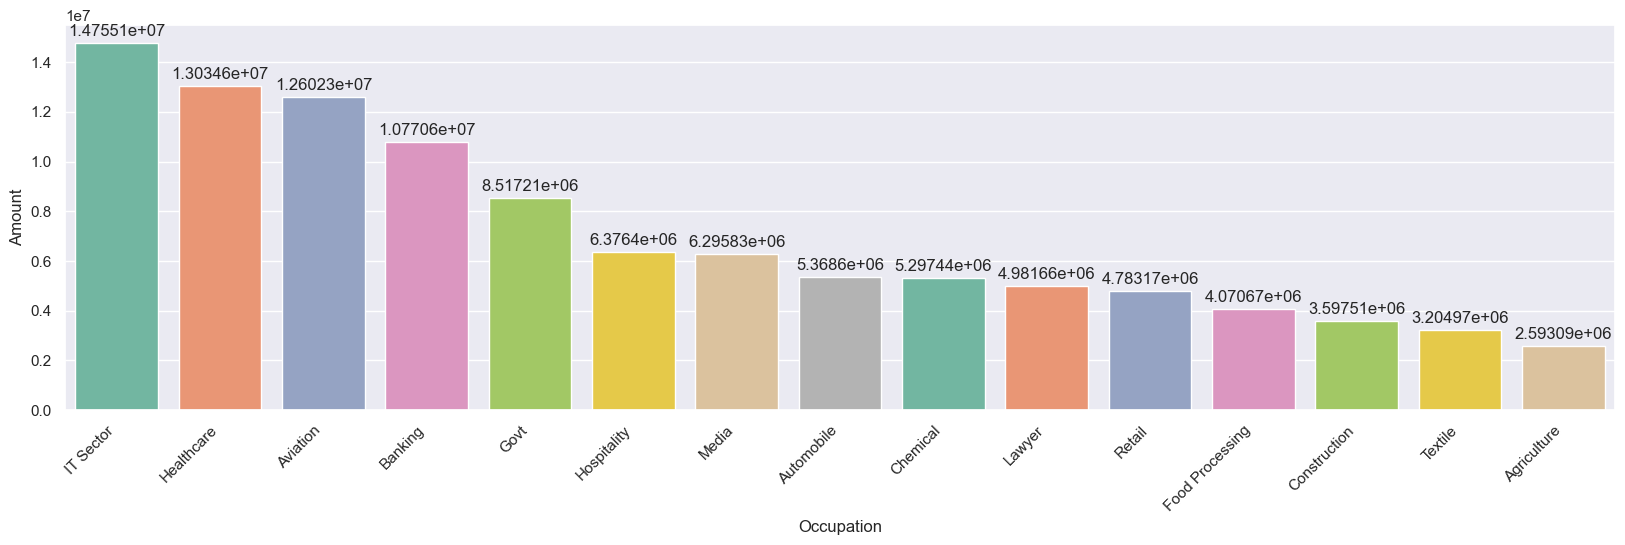

In [65]:
# Group the data by 'Occupation' and sum the 'Amount'
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='Occupation', y='Amount', palette='Set2')  # You can use other palettes like 'Blues', 'Set1', etc.

plt.xticks(rotation=45, ha='right')

for bars in plt.gca().containers:
    plt.gca().bar_label(bars, padding=3)
plt.show()

*Above graphs shows that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8988\1819120739.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Product_Category', palette='Set2')  # You can try other palettes like 'Set1', 'viridis', etc.


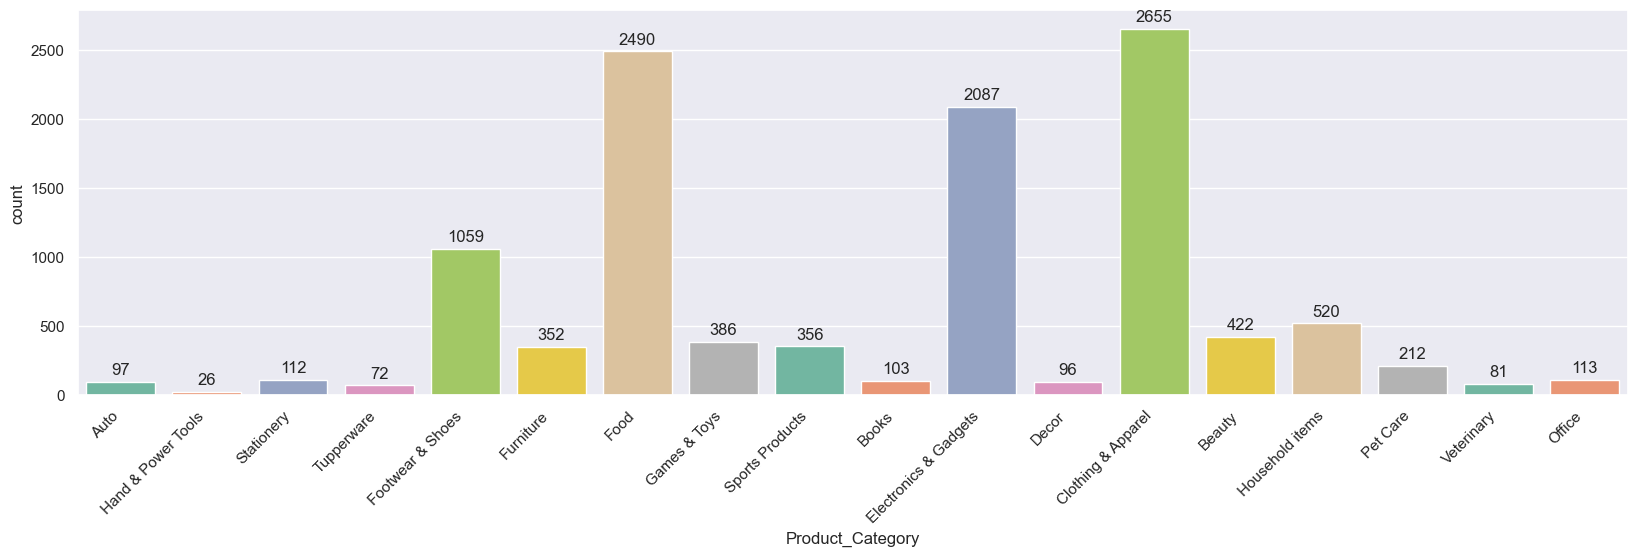

In [62]:
sns.set(rc={'figure.figsize':(20,5)})

ax = sns.countplot(data=df, x='Product_Category', palette='Set2') 

for bars in ax.containers:
    ax.bar_label(bars, padding=3)
plt.xticks(rotation=45, ha='right') 
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8988\2708400894.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_state, x='Product_Category', y='Amount', palette='viridis')  # You can try other palettes like 'Set2', 'Blues', 'coolwarm', etc.


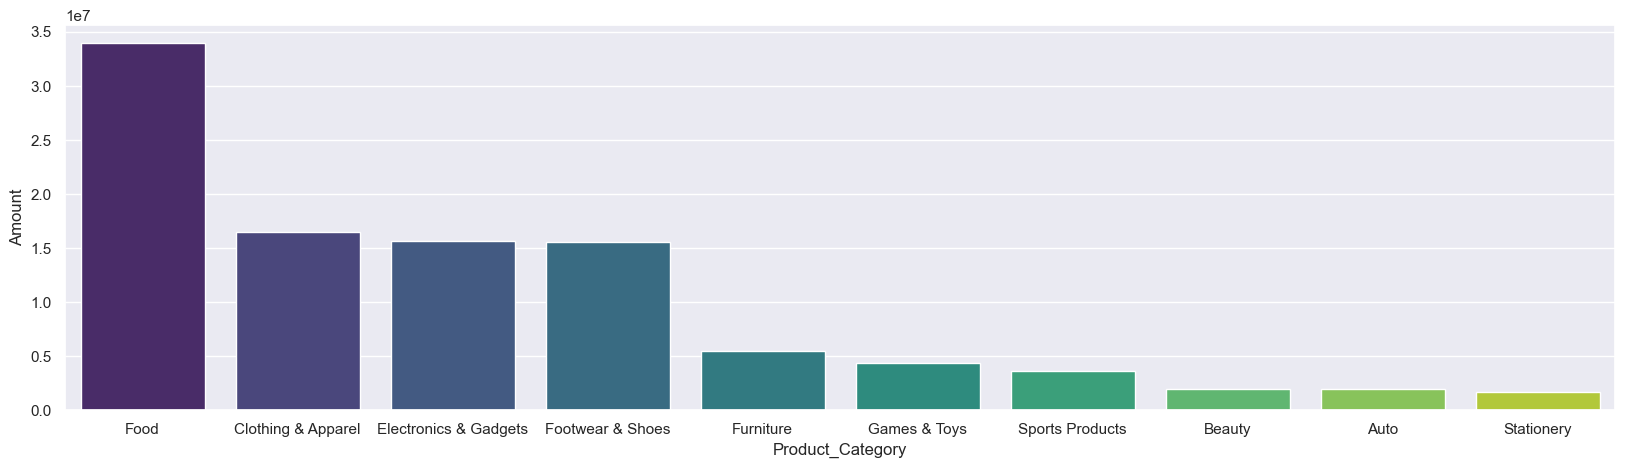

In [80]:
# Grouping the data
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(data=sales_state, x='Product_Category', y='Amount', palette='viridis') 
plt.show()

*These graphs shows that most of the sold products are from Food, Clothing,footwear and Electronics category*

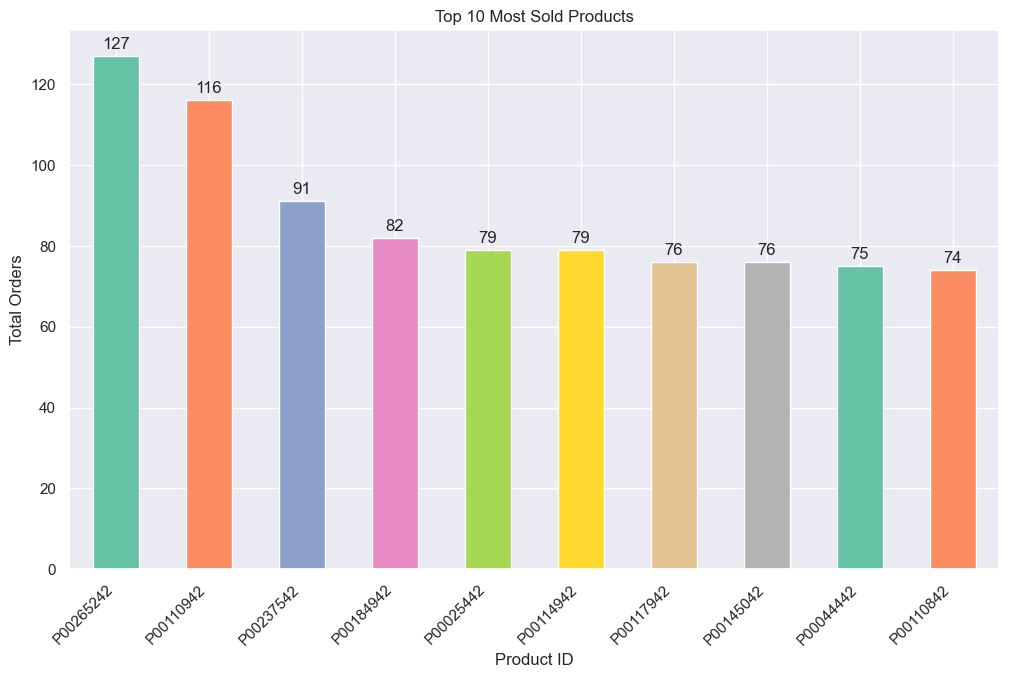

In [63]:
# Group by 'Product_ID' and sum the 'Orders', then get the top 10 most sold products
top_10_products = df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False)

fig1, ax1 = plt.subplots(figsize=(12, 7))
top_10_products.plot(kind='bar', ax=ax1, color=sns.color_palette('Set2', n_colors=10)) 
ax1.bar_label(ax1.containers[0], padding=3)
plt.xticks(rotation=45, ha='right')
ax1.set_title('Top 10 Most Sold Products')
ax1.set_xlabel('Product ID')
ax1.set_ylabel('Total Orders')
plt.show()

Conclusion

Based on the analysis, the key consumer segment for Diwali sales includes married women aged 26-35 years from Uttar Pradesh, Maharashtra, and Karnataka, who are employed in the IT, Healthcare, and Aviation sectors. These individuals are more likely to purchase products in the Food, Clothing, and Electronics categories, showcasing clear patterns in consumer behavior during the Diwali season.